In [1]:
!ls

class.csv  sample_data		  test.csv  train.csv
drive	   sample_submission.csv  test.zip  train.zip


In [0]:
!mkdir train
!cp train.zip train/
!unzip train/train.zip -d train

!mkdir test
!cp test.zip test/
!rm train.zip test.zip
!unzip test/test.zip -d test
!rm train/train.zip
!rm test/test.zip

In [3]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from keras import models, layers 
from keras import callbacks
from keras.applications import Xception
import cv2
import time
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.applications import MobileNetV2
from keras.utils import plot_model
from keras import optimizers
from keras.models import load_model
from keras import backend as K
import warnings 

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [4]:
!ls 

class.csv  sample_data		  test	    train
drive	   sample_submission.csv  test.csv  train.csv


In [0]:
def chop_img(data_type, path_df, margin = 15):
  """
     ex) chip_img('trian', train_df, margin = 20)
     
     data_type = train or test as string         
     path_df = train_df or test_df,
     marging = how many pixel left over 
     
     this function create directory as data_type_chop """
  
  if f'{data_type}_chop' in os.listdir('/content/'):
    os.removedirs(f'{data_type}_chop')
  else:
    os.mkdir(f'{data_type}_chop')                                            # make directory
    
  for i in range(len(path_df.img_file)):
    img = cv2.imread(f'/content/{data_type}/{path_df.iloc[i, 0]}')               # load image
    cv2.waitKey(0)
    
    crop_img = img[path_df.iloc[i, 2] : path_df.iloc[i, 4],     # y : y + h
                   path_df.iloc[i,1] : path_df.iloc[i, 3]]     # x : x + w

    cv2.imwrite(f'/content/{data_type}_chop/{path_df.iloc[i,0]}', crop_img)  # save the image
    
    cv2.waitKey(0)

In [0]:
# !rm -r /content/train_chop

In [0]:
train_df = pd.read_csv('train.csv')
train_df['class'] = train_df['class'].astype(str)

In [0]:
img = cv2.imread(f'/content/train/{train_df.iloc[0, 0]}')

In [9]:
img.shape

(500, 700, 3)

In [0]:
chop_img('train', train_df)

In [0]:
test_df = pd.read_csv('test.csv')

In [22]:
test_df.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,test_00001.jpg,199,184,1116,809
1,test_00002.jpg,55,61,480,257
2,test_00003.jpg,42,123,602,413
3,test_00004.jpg,13,8,619,393
4,test_00005.jpg,8,9,209,93


In [0]:
chop_img('test', test_df)

In [14]:
len(os.listdir('test_chop'))

6150

Train / Test / Holdout split

In [0]:
train_df = pd.read_csv('train.csv')
train_df.head()
train_df['class'] = train_df['class'].astype(str)

In [0]:
y = train_df['class']
x = train_df.drop('class', axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [0]:
train_set = pd.concat([X_train, y_train], axis = 1)

In [0]:
validation_set = pd.concat([X_test, y_test], axis=1)

In [9]:
print(train_df.shape)
print('-----------------')
print(train_set.shape)
print(validation_set.shape)

(9990, 6)
-----------------
(7992, 6)
(1998, 6)


In [10]:
train_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
2641,train_02642.jpg,65,23,601,393,31
237,train_00238.jpg,1,33,240,166,146
5195,train_05196.jpg,79,118,373,262,90
6581,train_06582.jpg,64,256,976,587,81
463,train_00464.jpg,168,172,877,592,3


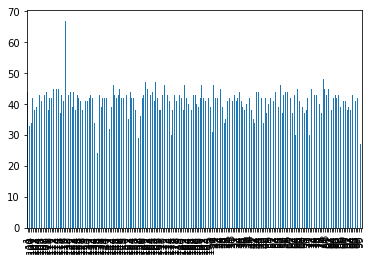

In [22]:
train_set['class'].value_counts().sort_index().plot(kind='bar')

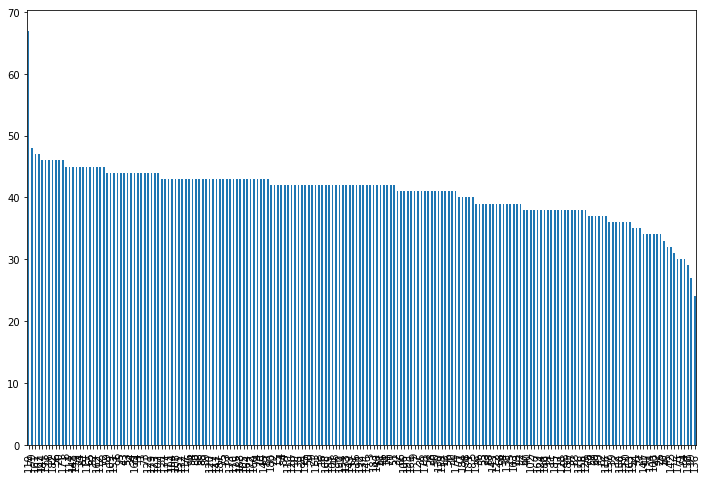

In [23]:
plt.figure(figsize=(12,8))
train_set['class'].value_counts().plot(kind='bar')

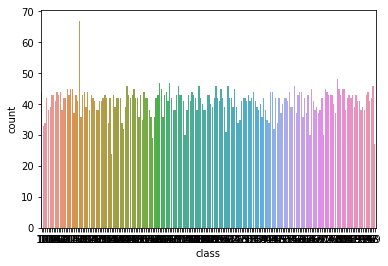

In [24]:
sns.countplot(train_set['class'])

In [25]:
train_set['class'].nunique()

196

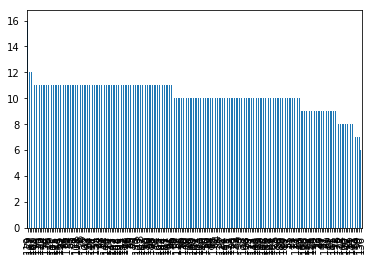

In [26]:
validation_set['class'].value_counts().plot(kind='bar')

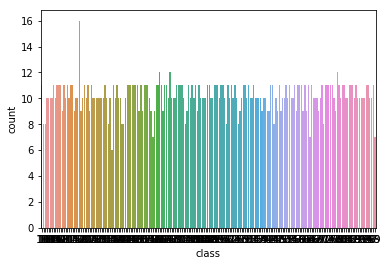

In [27]:
sns.countplot(validation_set['class'])

In [28]:
validation_set['class'].nunique()

196

Split Validation set  0.2 for Hold out set

In [11]:
validation_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
1980,train_01981.jpg,41,85,618,408,154
788,train_00789.jpg,10,28,268,157,31
3973,train_03974.jpg,75,121,603,370,60
8672,train_08673.jpg,67,29,576,461,139
6070,train_06071.jpg,29,248,760,522,20


In [0]:
val_x = validation_set.drop('class', axis=1)
val_y = validation_set['class']

In [0]:
X_val, X_hol, y_val, y_hol = train_test_split(val_x, val_y, test_size= 0.2, stratify = val_y, random_state=42)

In [14]:
print(X_val.shape, y_val.shape)

(1598, 5) (1598,)


In [0]:
validation_set = pd.concat([X_val, y_val], axis=1)
hold_out_set = pd.concat([X_hol, y_hol], axis=1)

In [16]:
print(validation_set.shape)
print(hold_out_set.shape)

(1598, 6)
(400, 6)


In [17]:
print('validation : ', validation_set['class'].nunique())
print('hold_out : ', hold_out_set['class'].nunique())

validation :  196
hold_out :  196


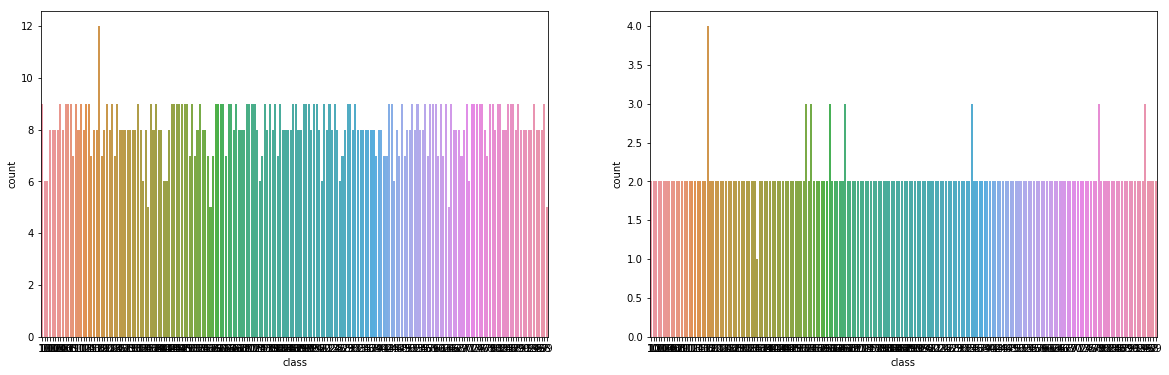

In [36]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot('class', data = validation_set)

plt.subplot(1,2,2)
sns.countplot('class', data = hold_out_set)

Spliting Done

In [18]:
print('Training Set, "train_set" :', train_set.shape)
print('Validation Set, "validation_set" :', validation_set.shape)
print('Hold Out Set, "hold_out_set" :', hold_out_set.shape)

Training Set, "train_set" : (7992, 6)
Validation Set, "validation_set" : (1598, 6)
Hold Out Set, "hold_out_set" : (400, 6)


In [0]:
test_df = pd.read_csv('test.csv')

In [0]:
test_df.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,test_00001.jpg,199,184,1116,809
1,test_00002.jpg,55,61,480,257
2,test_00003.jpg,42,123,602,413
3,test_00004.jpg,13,8,619,393
4,test_00005.jpg,8,9,209,93


# Generator 

In [0]:
datagen = image.ImageDataGenerator(rescale=1./255,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2, 
                                  rotation_range=20,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  shear_range=0.2)

validation_gen = image.ImageDataGenerator(rescale = 1./255)

holdout_gen = image.ImageDataGenerator(rescale = 1./255)

test_gen = image.ImageDataGenerator(rescale = 1./255)

In [24]:
train_data = datagen.flow_from_dataframe(train_set, '/content/train_chop', x_col='img_file', y_col='class', target_size=(224,224), class_mode='categorical', batch_size=32)

valid_data = validation_gen.flow_from_dataframe(validation_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(224,224), class_mode='categorical', batch_size=32)

holdout_eval = holdout_gen.flow_from_dataframe(hold_out_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(224,224), class_mode="categorical", batch_size=20)

holdout_data = holdout_gen.flow_from_dataframe(hold_out_set, '/content/train_chop', x_col = "img_file", y_col = None, target_size=(224,224), class_mode=None, batch_size=20)

test_data = test_gen.flow_from_dataframe(test_df, '/content/test_chop', x_col='img_file', y_col=None, target_size=(224,224), class_mode=None, batch_size=10, shuffle=False)

Found 7992 validated image filenames belonging to 196 classes.
Found 1598 validated image filenames belonging to 196 classes.
Found 400 validated image filenames belonging to 196 classes.
Found 400 validated image filenames.
Found 6150 validated image filenames.


# Predict hold Out-set

In [0]:
hold_out_y = hold_out_set['class']

In [0]:
label_enc = train_data.class_indices

when predict, the result is percentage via softmax, 

the arg max indice is ```train_data.class_indices``` value, true label is its key

to change predict to true label, change 

key, value ->  value, key

In [27]:
true_label_index = {}
for key, value in label_enc.items():
  true_label_index[value] = key
  
true_label_index

{0: '1',
 1: '10',
 2: '100',
 3: '101',
 4: '102',
 5: '103',
 6: '104',
 7: '105',
 8: '106',
 9: '107',
 10: '108',
 11: '109',
 12: '11',
 13: '110',
 14: '111',
 15: '112',
 16: '113',
 17: '114',
 18: '115',
 19: '116',
 20: '117',
 21: '118',
 22: '119',
 23: '12',
 24: '120',
 25: '121',
 26: '122',
 27: '123',
 28: '124',
 29: '125',
 30: '126',
 31: '127',
 32: '128',
 33: '129',
 34: '13',
 35: '130',
 36: '131',
 37: '132',
 38: '133',
 39: '134',
 40: '135',
 41: '136',
 42: '137',
 43: '138',
 44: '139',
 45: '14',
 46: '140',
 47: '141',
 48: '142',
 49: '143',
 50: '144',
 51: '145',
 52: '146',
 53: '147',
 54: '148',
 55: '149',
 56: '15',
 57: '150',
 58: '151',
 59: '152',
 60: '153',
 61: '154',
 62: '155',
 63: '156',
 64: '157',
 65: '158',
 66: '159',
 67: '16',
 68: '160',
 69: '161',
 70: '162',
 71: '163',
 72: '164',
 73: '165',
 74: '166',
 75: '167',
 76: '168',
 77: '169',
 78: '17',
 79: '170',
 80: '171',
 81: '172',
 82: '173',
 83: '174',
 84: '175',


In [0]:
def swishs(x):
  return x*K.sigmoid(x)

In [0]:
class swish_activate:
  def swishs(x):
    return x*K.sigmoid(x)

In [29]:
model_1 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710/mobile_net1.h5')
model_2 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710/mobile_net2.h5')
model_3 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710/mobile_net3.h5')
model_4 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710/mobile_net3_2.h5')
model_5 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710/mobile_net5.h5')
model_6 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710/mobile_net6_rmsprop.h5')
model_7 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710/mobile_net6_rmsprop_train_more.h5')

model_9 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710_xception/xception_retry1.h5', custom_objects={'swishs':swishs})
model_10 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710_xception/xception_retry2.h5', custom_objects={'swishs':swishs})
model_11 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710_xception/xception_retry3.h5', custom_objects={'swishs':swishs})
model_12 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710_xception/xception_retry4.h5', custom_objects={'swishs':swishs})
model_13 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710_xception/xception_retry5.h5', custom_objects={'swishs':swishs})
model_14 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710_xception/xception_retry6.h5', custom_objects={'swishs':swishs})
model_15 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710_xception/xception_retry7_rmsprop.h5', custom_objects={'swishs':swishs})
model_16 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/model_save_0710_xception/xception_retry7_rmsprop_1536.h5', custom_objects={'swishs':swishs})

model_17 = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/model_results/shared_model/new_m_densenet_e100_d03.h5')

W0714 05:39:28.937571 140391622965120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 05:39:28.994836 140391622965120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 05:39:29.018867 140391622965120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 05:39:29.020035 140391622965120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0714 05:39:29.020767 140391622

In [0]:
model_lists = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_9, model_10, model_11, model_12, model_13, model_14, model_15, model_16, model_17]

In [0]:
loss_val, acc_val = model_1.evaluate_generator(holdout_eval, steps=holdout_eval.n//holdout_eval.batch_size)

In [35]:
loss_val

0.4729381420649588

In [37]:
for model_num, model in enumerate(model_lists):
  loss_val, acc_val = model.evaluate_generator(holdout_eval, steps=holdout_eval.n//holdout_eval.batch_size)
                                                
  print(f'model', model_num+1, 'loss : ', loss_val, 'acc : ', acc_val)

model 1 loss :  0.5828056260943413 acc :  0.8474999994039536
model 2 loss :  0.3107782583683729 acc :  0.9199999928474426
model 3 loss :  0.8883292451500893 acc :  0.7825000047683716
model 4 loss :  0.46227505914866923 acc :  0.8974999934434891
model 5 loss :  0.46948368158191445 acc :  0.8700000017881393
model 6 loss :  0.7834225609898567 acc :  0.8699999988079071
model 7 loss :  0.6856655359268189 acc :  0.8250000029802322
model 8 loss :  0.3989661905914545 acc :  0.8899999976158142
model 9 loss :  0.4584771767258644 acc :  0.8775000005960465
model 10 loss :  0.46472449470311405 acc :  0.8774999916553498
model 11 loss :  0.34591950885951517 acc :  0.9024999886751175
model 12 loss :  0.5032541178166866 acc :  0.8624999970197678
model 13 loss :  0.6752088863402606 acc :  0.8325000017881393
model 14 loss :  0.35378279029391707 acc :  0.9099999964237213
model 15 loss :  0.6616953479824588 acc :  0.8975000023841858
model 16 loss :  0.8207032665610313 acc :  0.802499994635582


In [0]:
model_lists = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_9, model_10, model_11, model_12, model_13, model_14, model_15, model_16, model_17]

# single pred for model_2

In [0]:
test_data.reset()
y_pred = model_2.predict_generator(test_data, test_data.n//test_data.batch_size)

In [50]:
y_pred

array([[2.89091957e-04, 3.92993815e-09, 1.38082653e-11, ...,
        2.37704478e-09, 5.87855409e-09, 1.79244042e-09],
       [4.59314271e-12, 4.45584833e-14, 8.64715244e-12, ...,
        3.29107022e-13, 9.99994397e-01, 1.55118106e-11],
       [1.25245911e-10, 3.07972710e-11, 1.86933982e-10, ...,
        3.56084621e-14, 4.93321252e-11, 1.73667636e-10],
       ...,
       [1.54664066e-14, 2.74564605e-13, 3.95749405e-10, ...,
        1.05429505e-10, 2.44972844e-11, 3.76062480e-11],
       [4.19482090e-14, 1.79198494e-14, 3.00912489e-11, ...,
        6.92055462e-13, 5.29776180e-12, 1.50425838e-10],
       [1.20508986e-07, 3.66356140e-10, 1.25154304e-10, ...,
        1.94620043e-06, 1.93709471e-09, 2.18559919e-07]], dtype=float32)

In [51]:
y_pred.shape

(6150, 196)

In [52]:
y_pred.argmax(axis=1)

array([ 28, 194,  64, ..., 135, 142, 190])

In [0]:
y_submit = []
for y_pred_index in y_pred.argmax(axis=1):
  y_submit.append(true_label_index[y_pred_index])

In [54]:
np.array(y_submit)

array(['124', '98', '157', ..., '44', '50', '94'], dtype='<U3')

In [0]:
test_data.reset()
y_pred_2 = model_10.predict_generator(test_data, test_data.n//test_data.batch_size)

In [56]:
y_pred_2

array([[7.52126575e-02, 3.17946878e-08, 1.77798665e-09, ...,
        3.66873996e-06, 9.73615855e-09, 1.00471098e-07],
       [1.33022648e-09, 1.92203629e-06, 2.17130847e-09, ...,
        2.72216016e-06, 9.97724473e-01, 6.07723916e-09],
       [9.50676871e-09, 1.05867346e-11, 6.12560243e-08, ...,
        2.19983518e-10, 4.50158577e-10, 7.35272465e-09],
       ...,
       [2.42246436e-12, 1.85507987e-09, 5.72906433e-09, ...,
        2.16862639e-09, 1.11375684e-07, 3.53810243e-08],
       [1.01187014e-09, 1.84590532e-09, 5.16214322e-06, ...,
        4.51076537e-10, 3.25608269e-08, 1.90396444e-04],
       [1.20349841e-10, 1.20471622e-09, 7.43960171e-10, ...,
        7.30037164e-06, 1.61036440e-09, 6.46578087e-07]], dtype=float32)

In [43]:
y_pred_2.shape

(6150, 196)

In [60]:
np.mean([y_pred, y_pred_2], axis=0).shape

(6150, 196)

# ensemble all models

In [0]:
y_pred_list = []
for model_num, model in enumerate(model_lists):
  test_data.reset()
  y_pred = model.predict_generator(test_data, test_data.n//test_data.batch_size)
  y_pred_list.append(y_pred)

ensemble_mean = np.mean(y_pred_list, axis=0)

In [64]:
ensemble_mean

array([[5.90632344e-03, 3.61817683e-06, 1.34339120e-06, ...,
        2.82899373e-06, 7.14959651e-06, 6.02482771e-07],
       [2.09895575e-06, 1.42456820e-05, 1.64349476e-05, ...,
        2.36418509e-05, 9.66956556e-01, 2.56827605e-07],
       [1.04335030e-07, 7.66609537e-06, 5.82043867e-05, ...,
        3.40932864e-08, 4.72826798e-07, 1.87430189e-07],
       ...,
       [1.04750715e-08, 9.60039586e-08, 1.85913080e-07, ...,
        7.67587665e-08, 1.51094454e-07, 8.73061339e-08],
       [3.52714160e-08, 1.19515704e-07, 4.65136225e-04, ...,
        8.82890774e-08, 2.67899850e-07, 4.41928023e-05],
       [1.23584822e-08, 4.26821956e-09, 1.37446921e-09, ...,
        4.17331576e-05, 2.20162866e-09, 1.62222250e-06]], dtype=float32)

In [66]:
ensemble_mean.argmax(axis=1)

array([ 28, 194,  64, ..., 135, 142, 190])

In [0]:
y_submit = []
for y_pred_index in ensemble_mean.argmax(axis=1):
  y_submit.append(true_label_index[y_pred_index])

In [68]:
y_submit

['124',
 '98',
 '157',
 '94',
 '18',
 '147',
 '2',
 '75',
 '191',
 '183',
 '1',
 '168',
 '91',
 '27',
 '17',
 '21',
 '115',
 '74',
 '155',
 '60',
 '177',
 '107',
 '110',
 '67',
 '92',
 '169',
 '98',
 '174',
 '156',
 '147',
 '127',
 '160',
 '137',
 '9',
 '180',
 '68',
 '175',
 '153',
 '80',
 '173',
 '193',
 '121',
 '157',
 '1',
 '89',
 '87',
 '22',
 '74',
 '112',
 '53',
 '187',
 '76',
 '91',
 '39',
 '142',
 '102',
 '73',
 '180',
 '157',
 '107',
 '62',
 '145',
 '150',
 '126',
 '106',
 '59',
 '7',
 '158',
 '171',
 '195',
 '181',
 '54',
 '99',
 '137',
 '104',
 '178',
 '51',
 '110',
 '99',
 '160',
 '70',
 '37',
 '43',
 '147',
 '147',
 '72',
 '181',
 '147',
 '95',
 '10',
 '81',
 '35',
 '163',
 '167',
 '30',
 '147',
 '158',
 '117',
 '2',
 '32',
 '160',
 '174',
 '91',
 '190',
 '40',
 '54',
 '193',
 '5',
 '122',
 '140',
 '127',
 '157',
 '90',
 '60',
 '190',
 '178',
 '97',
 '86',
 '31',
 '162',
 '4',
 '54',
 '52',
 '82',
 '140',
 '144',
 '6',
 '105',
 '82',
 '137',
 '176',
 '19',
 '179',
 '145',

In [0]:
submit_df = pd.read_csv('/content/sample_submission.csv', index_col='img_file')

In [0]:
submit_df['class'] = y_submit

In [71]:
submit_df

,class
img_file,
test_00001.jpg,124
test_00002.jpg,98
test_00003.jpg,157
test_00004.jpg,94
test_00005.jpg,18
test_00006.jpg,147
test_00007.jpg,2
test_00008.jpg,75
test_00009.jpg,191


In [0]:
submit_df.to_csv('test_submission.csv')

# select only lowest val loss

In [74]:
for model_num, model in enumerate(model_lists):
  loss_val, acc_val = model.evaluate_generator(holdout_eval, steps=holdout_eval.n//holdout_eval.batch_size)
                                                
  print(f'model ', model_num, '  loss : ', loss_val, '  acc : ', acc_val)

model  0   loss :  0.5439858313649892   acc :  0.8400000035762787
model  1   loss :  0.37667807852849367   acc :  0.909999993443489
model  2   loss :  0.9383771613240242   acc :  0.7650000005960464
model  3   loss :  0.4178082836791873   acc :  0.9024999976158142
model  4   loss :  0.4802223648875952   acc :  0.8699999988079071
model  5   loss :  0.6988719648681581   acc :  0.8749999970197677
model  6   loss :  0.5721037864685059   acc :  0.825
model  7   loss :  0.44618933722376825   acc :  0.8775000005960465
model  8   loss :  0.4421399660408497   acc :  0.8874999940395355
model  9   loss :  0.41999188885092736   acc :  0.8774999946355819
model  10   loss :  0.4045358062721789   acc :  0.8850000023841857
model  11   loss :  0.411474584415555   acc :  0.8774999976158142
model  12   loss :  0.7505174428224564   acc :  0.8100000023841858
model  13   loss :  0.34566858820617197   acc :  0.9249999910593033
model  14   loss :  0.6626278297044337   acc :  0.8949999868869781
model  15   loss

In [0]:
model_lists[0,2,5,12,14,15]

In [0]:
model_lists = [model_2, model_4, model_5, model_9, model_10, model_11, model_12, model_13, model_15]

In [85]:
for model_num, model in enumerate(model_lists):
  loss_val, acc_val = model.evaluate_generator(holdout_eval, steps=holdout_eval.n//holdout_eval.batch_size)
                                                
  print(f'model ', model_num, '  loss : ', loss_val, '  acc : ', acc_val)

model  0   loss :  0.3711545903235674   acc :  0.9074999928474426
model  1   loss :  0.41417621159926055   acc :  0.9149999976158142
model  2   loss :  0.5450939604081213   acc :  0.8599999964237213
model  3   loss :  0.4626045962795615   acc :  0.8874999970197678
model  4   loss :  0.44326972737908366   acc :  0.889999994635582
model  5   loss :  0.39894205462187526   acc :  0.8999999970197677
model  6   loss :  0.3376635180786252   acc :  0.8974999964237214
model  7   loss :  0.5659790769219398   acc :  0.85
model  8   loss :  0.508783618407324   acc :  0.8999999940395356


In [0]:
y_pred_list = []
for model_num, model in enumerate(model_lists):
  test_data.reset()
  y_pred = model.predict_generator(test_data, test_data.n//test_data.batch_size)
  y_pred_list.append(y_pred)

ensemble_mean = np.mean(y_pred_list, axis=0)

In [87]:
ensemble_mean

array([[9.1662966e-03, 5.0780522e-09, 6.0942906e-10, ..., 7.9674305e-07,
        2.2003381e-09, 8.1298261e-08],
       [1.6449859e-09, 1.5032555e-06, 4.3432546e-09, ..., 7.2299844e-07,
        9.9812341e-01, 7.9033153e-09],
       [1.5180740e-08, 8.6027449e-11, 1.8656020e-07, ..., 1.0882798e-09,
        9.3810248e-10, 3.5284999e-09],
       ...,
       [1.0291111e-11, 6.4500689e-09, 8.0871665e-08, ..., 5.5385900e-09,
        9.0203649e-08, 5.8338099e-08],
       [1.2671714e-10, 1.0139448e-09, 8.7184901e-07, ..., 1.1618208e-10,
        2.2965262e-08, 2.6150248e-05],
       [1.4100887e-08, 1.5392980e-09, 7.9858287e-10, ..., 9.2071932e-06,
        3.3056651e-09, 2.2314857e-06]], dtype=float32)

In [88]:
ensemble_mean.argmax(axis=1)

array([ 28, 194,  64, ..., 135, 142, 190])

In [0]:
y_submit = []
for y_pred_index in ensemble_mean.argmax(axis=1):
  y_submit.append(true_label_index[y_pred_index])

In [90]:
y_submit

['124',
 '98',
 '157',
 '94',
 '18',
 '147',
 '2',
 '75',
 '191',
 '183',
 '1',
 '168',
 '91',
 '27',
 '17',
 '21',
 '115',
 '74',
 '155',
 '60',
 '177',
 '107',
 '110',
 '67',
 '92',
 '169',
 '98',
 '174',
 '156',
 '147',
 '127',
 '160',
 '137',
 '9',
 '180',
 '68',
 '175',
 '153',
 '80',
 '173',
 '193',
 '121',
 '157',
 '1',
 '89',
 '87',
 '22',
 '74',
 '112',
 '53',
 '187',
 '76',
 '91',
 '39',
 '142',
 '102',
 '73',
 '180',
 '157',
 '107',
 '62',
 '145',
 '150',
 '126',
 '106',
 '59',
 '7',
 '158',
 '171',
 '195',
 '181',
 '54',
 '99',
 '137',
 '104',
 '178',
 '51',
 '110',
 '99',
 '160',
 '70',
 '37',
 '43',
 '147',
 '147',
 '72',
 '181',
 '147',
 '95',
 '10',
 '81',
 '35',
 '163',
 '167',
 '30',
 '147',
 '158',
 '117',
 '2',
 '32',
 '160',
 '174',
 '91',
 '190',
 '40',
 '75',
 '193',
 '5',
 '122',
 '140',
 '127',
 '157',
 '90',
 '60',
 '190',
 '178',
 '97',
 '86',
 '31',
 '162',
 '4',
 '54',
 '52',
 '82',
 '140',
 '144',
 '6',
 '105',
 '82',
 '137',
 '176',
 '19',
 '179',
 '145',

In [0]:
submit_df = pd.read_csv('/content/sample_submission.csv', index_col='img_file')

In [0]:
submit_df['class'] = y_submit

In [93]:
submit_df

,class
img_file,
test_00001.jpg,124
test_00002.jpg,98
test_00003.jpg,157
test_00004.jpg,94
test_00005.jpg,18
test_00006.jpg,147
test_00007.jpg,2
test_00008.jpg,75
test_00009.jpg,191


In [0]:
submit_df.to_csv('test_submission2.csv')